/var/folders/4t/hw5gz2q12pz4jn6xw6dcldnm0000gn/T/ipykernel_98393/2307915235.py:23: RuntimeWarning: invalid value encountered in scalar power
  return x**(1/3)
/var/folders/4t/hw5gz2q12pz4jn6xw6dcldnm0000gn/T/ipykernel_98393/2307915235.py:23: RuntimeWarning: invalid value encountered in power
  return x**(1/3)


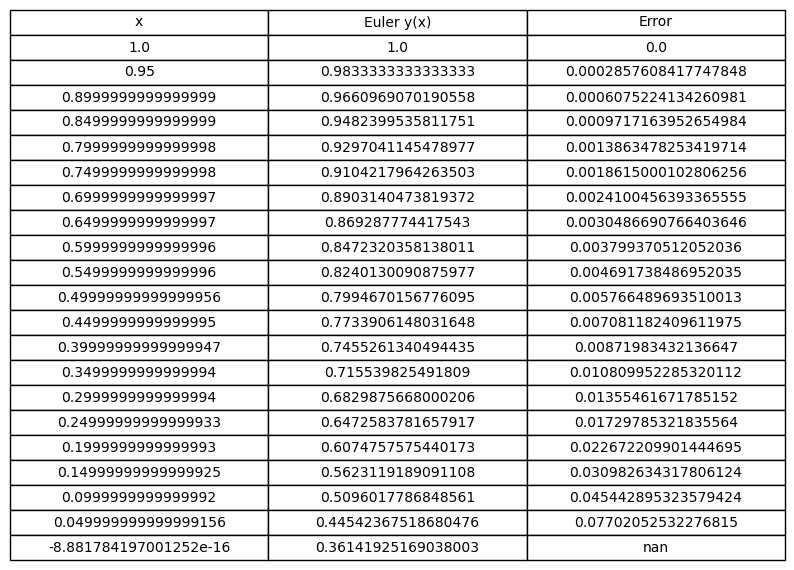

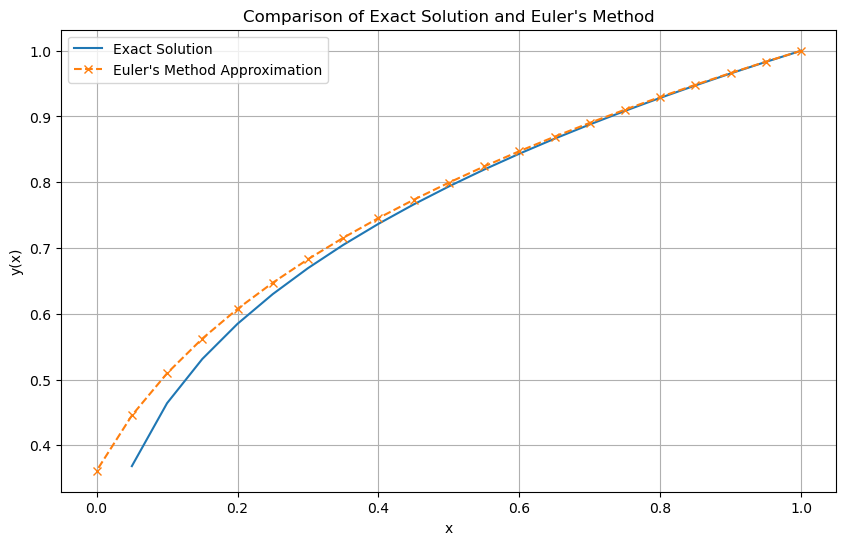

Mean Squared Error: 0.0005


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the differential equation dy/dx = 1 / (3 * y**2)
def f(y):
    return 1 / (3 * y**2)

# Implement Euler's method
def euler_method(step_size, x_start, x_end, y_initial):
    x_values = np.arange(x_start, x_end + step_size, step_size)
    y_values = [y_initial]
    y_current = y_initial

    for i in range(1, len(x_values)):
        y_current += step_size * f(y_current)
        y_values.append(y_current)
    
    return x_values, y_values

# Exact solution for comparison (derived from the differential equation)
def exact_solution(x):
    return x**(1/3)

# Parameters
step_size = 0.05
x_start = 1.0  # Starting from x=1 because y(1)=1
x_end = 0.0
y_initial = 1.0

# Reverse the interval to calculate from x=1 to x=0
x_values, euler_approximations = euler_method(-step_size, x_start, x_end, y_initial)

# Create a DataFrame for tabular representation
errors = [abs(exact_solution(x) - y) for x, y in zip(x_values, euler_approximations)]
data = {
    'x': x_values,
    'Euler y(x)': euler_approximations,
    'Error': errors
}
df = pd.DataFrame(data)

# Display the table using matplotlib
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.scale(1, 1.5)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, exact_solution(x_values), label="Exact Solution")
plt.plot(x_values, euler_approximations, label="Euler's Method Approximation", linestyle='--', marker='x')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("Comparison of Exact Solution and Euler's Method")
plt.legend()
plt.grid()
plt.show()

# the mean squared error
mse = np.mean(np.array(errors[:-1])**2)
print(f"Mean Squared Error: {mse:.4f}")


/var/folders/4t/hw5gz2q12pz4jn6xw6dcldnm0000gn/T/ipykernel_98393/65150806.py:28: RuntimeWarning: invalid value encountered in scalar power
  return x**(1/3)
/var/folders/4t/hw5gz2q12pz4jn6xw6dcldnm0000gn/T/ipykernel_98393/65150806.py:28: RuntimeWarning: invalid value encountered in power
  return x**(1/3)


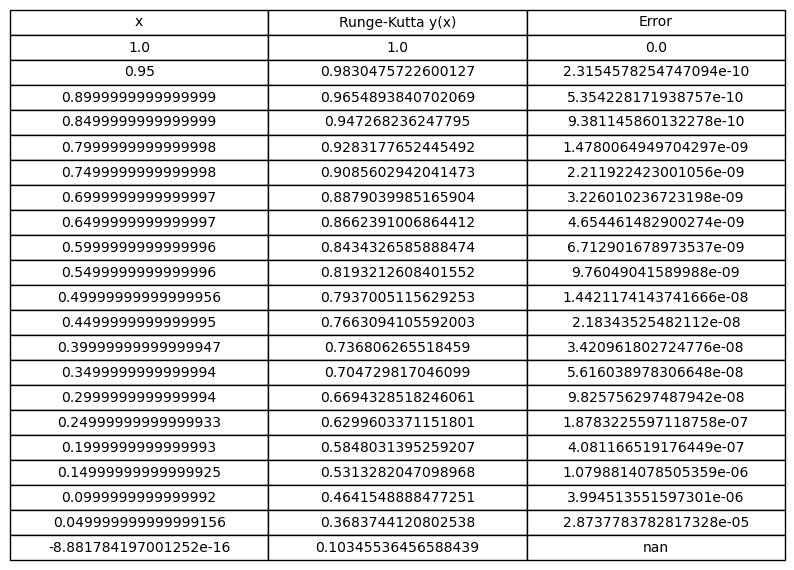

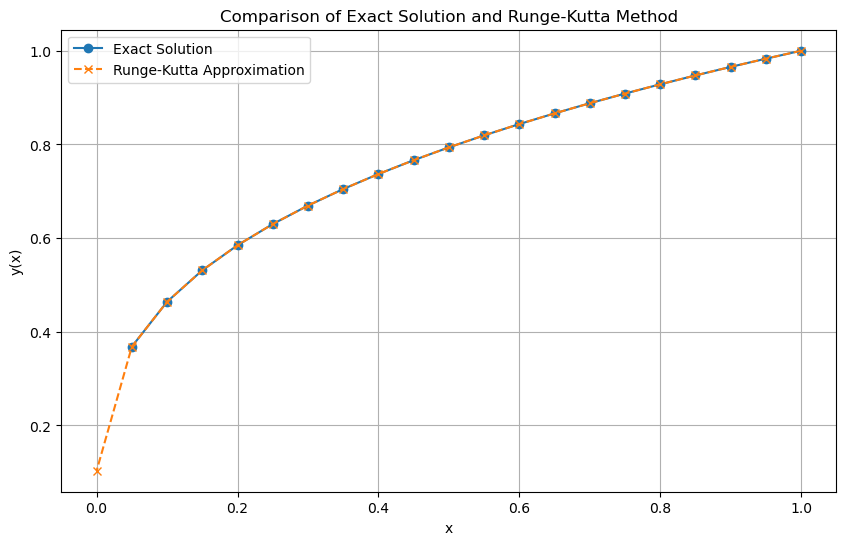

Mean Squared Error: 0.000000


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the differential equation dy/dx = 1 / (3 * y**2)
def f(y):
    return 1 / (3 * (y**2))

# Implement fourth-order Runge-Kutta method
def runge_kutta_method(step_size, x_start, x_end, y_initial):
    x_values = np.arange(x_start, x_end + step_size, step_size)
    y_values = [y_initial]
    y_current = y_initial

    for x in x_values[:-1]:  # Exclude the last x because we compute forward
        k1 = step_size * f(y_current)
        k2 = step_size * f(y_current + k1 / 2)
        k3 = step_size * f(y_current + k2 / 2)
        k4 = step_size * f(y_current + k3)
        
        y_current += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y_values.append(y_current)
    
    return x_values, y_values

# Exact solution for comparison (from differential equation)
def exact_solution(x):
    return x**(1/3)

# Parameters
step_size = -0.05
x_start = 1.0
x_end = 0.0
y_initial = 1.0

# Calculate using Runge-Kutta method
x_values, rk4_approximations = runge_kutta_method(step_size, x_start, x_end, y_initial)

# Calculate exact values and errors
errors = [abs(exact_solution(x) - y) for x, y in zip(x_values, rk4_approximations)]
data = {
    'x': x_values,
    'Runge-Kutta y(x)': rk4_approximations,
    'Error': errors
}
df = pd.DataFrame(data)

# Display the table using matplotlib
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.scale(1, 1.5)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, exact_solution(np.array(x_values)), label="Exact Solution", linestyle='-', marker='o')
plt.plot(x_values, rk4_approximations, label="Runge-Kutta Approximation", linestyle='--', marker='x')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("Comparison of Exact Solution and Runge-Kutta Method")
plt.legend()
plt.grid()
plt.show()

# the mean squared error
mse = np.mean(np.array(errors[:-1])**2)
print(f"Mean Squared Error: {mse:.6f}")

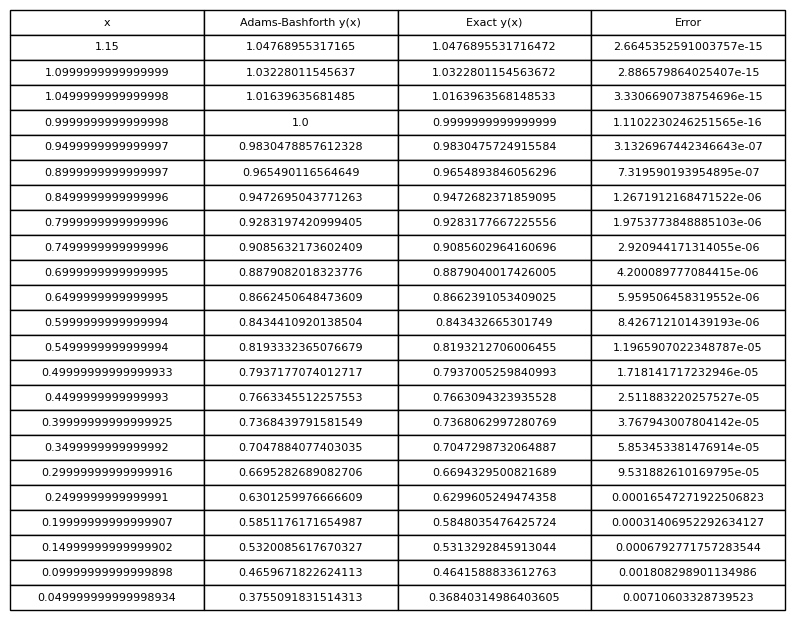

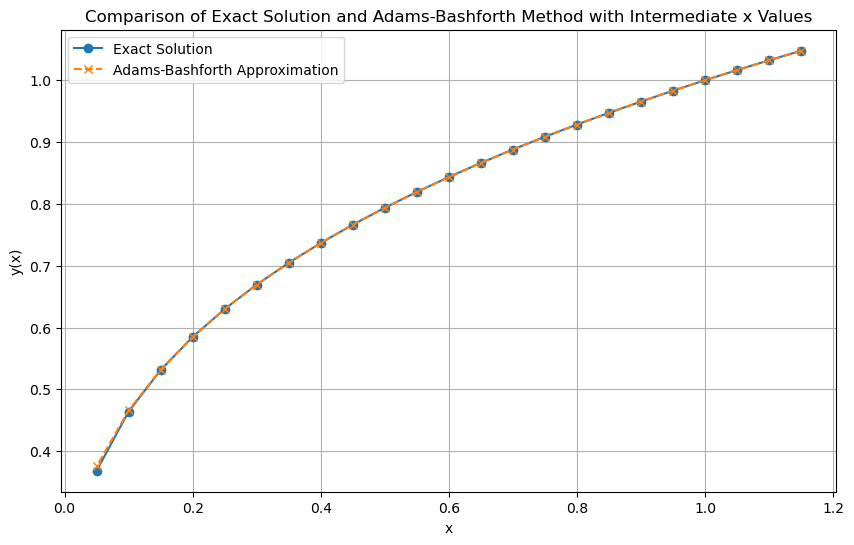

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the differential equation dy/dx = 1 / (3 * y**2)
def f(y):
    return 1 / (3 * (y**2))

# Implement fourth-order Adams-Bashforth method
def adams_bashforth_method(step_size, x_values, y_values):
    results = y_values.copy()
    
    for i in range(3, len(x_values) - 1):
        yn = results[i]
        yn_minus_1 = results[i - 1]
        yn_minus_2 = results[i - 2]
        yn_minus_3 = results[i - 3]
        
        yn_plus_1 = yn + (step_size / 24) * (
            55 * f(yn) - 59 * f(yn_minus_1) + 37 * f(yn_minus_2) - 9 * f(yn_minus_3)
        )
        results.append(yn_plus_1)
    
    return x_values, results

# Exact solution for comparison
def exact_solution(x):
    return x**(1/3)

# Parameters
step_size = -0.05
x_start = 1.0
x_end = 0.0

# Generate x_values list with intermediate values and initial values for Adams-Bashforth
x_values = np.arange(1.15, x_end, step_size)  # From 1.15 down to approximately 0
initial_values = [1.04768955317165, 1.03228011545637, 1.01639635681485, 1.0]

# Calculate using Adams-Bashforth method
_, ab_approximations = adams_bashforth_method(step_size, x_values, initial_values)

# Calculate exact values and errors
exact_values = [exact_solution(x) for x in x_values[:len(ab_approximations)]]
errors = [abs(exact - approx) for exact, approx in zip(exact_values, ab_approximations)]
data = {
    'x': x_values[:len(ab_approximations)],
    'Adams-Bashforth y(x)': ab_approximations,
    'Exact y(x)': exact_values,
    'Error': errors
}
df = pd.DataFrame(data)

# Display the table using matplotlib
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.scale(1, 1.5)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values[:len(ab_approximations)], exact_values, label="Exact Solution", linestyle='-', marker='o')
plt.plot(x_values[:len(ab_approximations)], ab_approximations, label="Adams-Bashforth Approximation", linestyle='--', marker='x')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("Comparison of Exact Solution and Adams-Bashforth Method with Intermediate x Values")
plt.legend()
plt.grid()
plt.show()